In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def str2msec(timestamp: str):
    hours, minutes, seconds, milliseconds = map(int, timestamp.split(":"))
    total = (hours * 60 * 60) + (minutes * 60) + (seconds) + milliseconds/10000
    return total

In [4]:
CSV_PATH = "Keynect pro 1.csv"
data = pd.read_csv(CSV_PATH, index_col=None)

In [57]:
CAN_ID_LIST = np.unique(data['CAN ID'])
data['Time_ms'] = [int(str2msec(i)*1000)/10 for i in data['Time']]
# data['Time_ms'] = [i for i in data['Time_ms']]
TIME_LIST = np.unique(data['Time_ms'])

In [34]:

data['T_10'] = [int(t/100) for t in data['Time_ms']]


In [35]:
Traffic_byte = []
Traffic_msgs = []
T_uniq = np.unique(data['T_10'])

for t in T_uniq:
    tmp = data[data['T_10']==t]
    Traffic_byte.append(np.sum(tmp['DLC']))
    Traffic_msgs.append(len(tmp['DLC']))

In [36]:
T_all = np.arange(np.min(T_uniq), np.max(T_uniq)+1, 1)
Traffic_byte_all = np.zeros_like(T_all)
for i, t in enumerate(T_uniq):
    Traffic_byte_all[np.where(T_all==t)] = Traffic_byte[i]
    


Text(0, 0.5, 'Traffic [kB/s]')

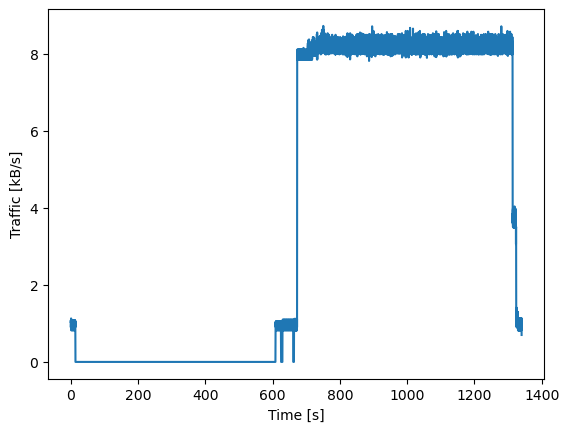

In [37]:
plt.plot(T_all/10, Traffic_byte_all/100)
plt.xlabel('Time [s]')
plt.ylabel('Traffic [kB/s]')

In [12]:
vbo = pd.read_csv('Keynect_ProMaster_0001_RAW.csv')



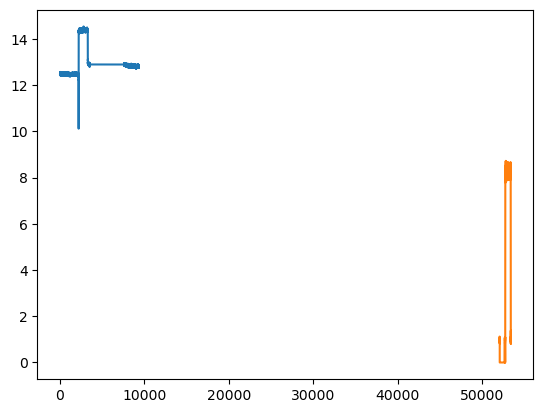

In [32]:
plt.plot(np.array(vbo['time'])-vbo.loc[0, 'time'], np.array(vbo['IVT_Result_U1'])/1000)
# plt.plot(np.array(vbo['time']), np.array(vbo['IVT_Result_U1'])/1000)
plt.plot(T_all/10+2000, Traffic_byte_all/100)


In [53]:
vbo_t = np.array(vbo['time'])
vbo_v = np.array(vbo['IVT_Result_U1'])/1000

can_t = np.array(data['Time_ms'])
can_v = np.array(data['DLC'])

ucan_t, indices = np.unique(can_t, return_inverse=True)
ucan_v = np.bincount(indices, weights=can_v)

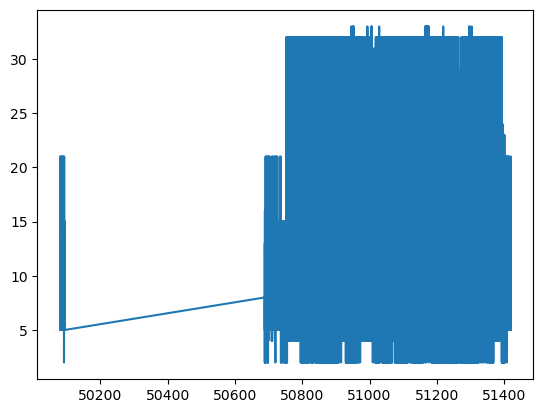

In [56]:
plt.plot(ucan_t, ucan_v)

5110.7123 4622.9


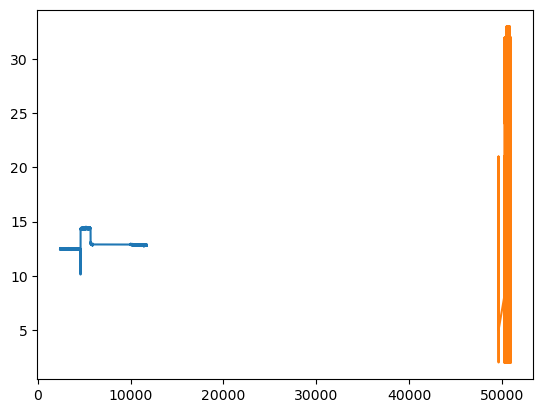

In [55]:
t_max_can = ucan_t[np.argmax(np.diff(ucan_v))]/10
t_max_vbo = vbo_t[np.argmax(np.diff(vbo_v))]
print(t_max_can, t_max_vbo)

t_new = ucan_t + t_max_vbo - t_max_can

plt.plot(vbo_t, vbo_v)
# plt.plot(np.array(vbo['time']), np.array(vbo['IVT_Result_U1'])/1000)
plt.plot(t_new, ucan_v)

In [41]:
1400/60


23.333333333333332